In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)


In [50]:
# tiremos un dado 200 veces
dado_results = np.random.choice([1, 2, 3, 4, 5, 6], 200)
dado_results

array([5, 1, 3, 2, 4, 3, 3, 5, 2, 1, 4, 4, 6, 1, 2, 3, 3, 3, 4, 1, 2, 3,
       4, 6, 1, 6, 1, 4, 5, 5, 3, 6, 4, 1, 4, 6, 4, 2, 5, 1, 5, 5, 3, 6,
       6, 2, 1, 5, 4, 3, 2, 5, 2, 4, 6, 1, 4, 1, 4, 2, 1, 5, 3, 2, 4, 3,
       3, 3, 6, 1, 6, 2, 4, 4, 6, 3, 3, 1, 3, 3, 5, 2, 5, 1, 4, 6, 3, 4,
       1, 6, 6, 5, 4, 3, 4, 6, 1, 1, 2, 6, 6, 3, 4, 1, 5, 6, 1, 4, 1, 4,
       5, 1, 3, 4, 1, 6, 3, 2, 2, 6, 4, 6, 2, 3, 4, 5, 4, 4, 4, 2, 5, 5,
       6, 1, 3, 4, 3, 5, 3, 5, 5, 6, 6, 3, 5, 1, 3, 3, 5, 3, 2, 4, 6, 4,
       6, 4, 2, 3, 6, 3, 3, 2, 3, 6, 2, 2, 5, 4, 5, 6, 5, 3, 5, 6, 1, 4,
       3, 1, 6, 5, 2, 3, 4, 1, 3, 6, 4, 2, 3, 4, 6, 2, 2, 5, 2, 6, 6, 5,
       2, 2])

In [51]:
#contemos los resultados

resultados_dado = {}
for e in dado_results:
    resultados_dado[e] = resultados_dado.get(e, 0) +1

resultados_dado

{np.int64(5): 30,
 np.int64(1): 28,
 np.int64(3): 40,
 np.int64(2): 29,
 np.int64(4): 38,
 np.int64(6): 35}

In [52]:
resultados_dado.keys()
resultados_dado.values()


dict_values([30, 28, 40, 29, 38, 35])

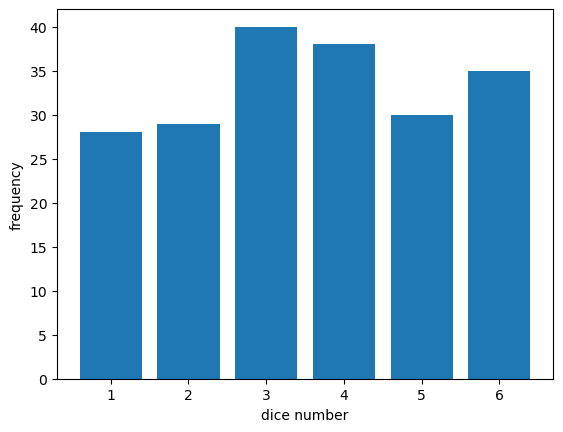

In [53]:
plt.bar(x=resultados_dado.keys(),
        height=resultados_dado.values())


plt.xlabel('dice number')
plt.ylabel('frequency')
plt.show()

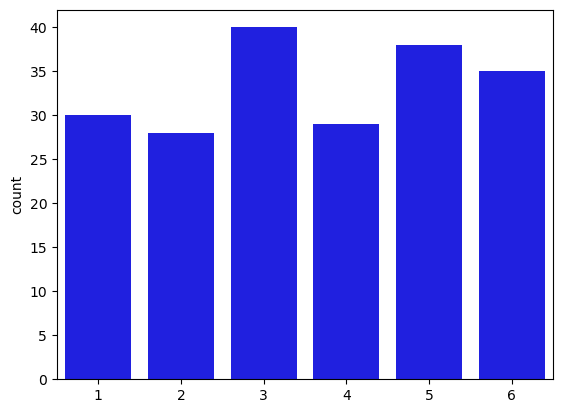

In [56]:
# seaborn has a nice function to do this as well
#sns.barplot(x=resultados_dado, color='b');
sns.countplot(x=resultados_dado.keys(), height=resultados_dado.values(),color='b');


In [20]:
data = pd.read_csv("../data/hours_vs_mark.csv", index_col=0)

In [3]:
data

,hours,mark
0,865,95
1,4,12
2,305,35
3,437,56
4,682,86
...,...,...
95,252,66
96,49,21
97,792,97
98,310,46


<Axes: xlabel='hours', ylabel='mark'>

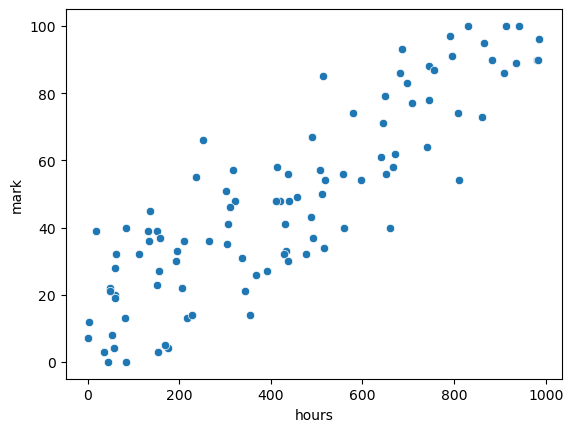

In [71]:
sns.scatterplot(x=data['hours'], y=data['mark'])

Lets try a linear regression $$Y = m * X + n$$

$m$ is the slope  
$n$ is the value of $Y$ when $X=0$ 

$$mark = m * hours + n$$

In [79]:
# supongo que: cada hora de estudio, representa 0.1 puntos de la nota
data['prediction_1'] = data.hours * 0.1 

In [80]:
data.head()

,hours,mark,prediction_1
0,865,95,86.5
1,4,12,0.4
2,305,35,30.5
3,437,56,43.7
4,682,86,68.2


In [81]:
data['prediction_2'] = data.hours * 0.3 + 10


In [82]:
data.head()

,hours,mark,prediction_1,prediction_2
0,865,95,86.5,269.5
1,4,12,0.4,11.2
2,305,35,30.5,101.5
3,437,56,43.7,141.1
4,682,86,68.2,214.6


In [83]:
data['error_1'] = (data.mark - data.prediction_1).abs()

In [84]:
data['error_2'] = (data.mark - data.prediction_2).abs()

In [85]:
data.head()

,hours,mark,prediction_1,prediction_2,error_1,error_2
0,865,95,86.5,269.5,8.5,174.5
1,4,12,0.4,11.2,11.6,0.8
2,305,35,30.5,101.5,4.5,66.5
3,437,56,43.7,141.1,12.3,85.1
4,682,86,68.2,214.6,17.8,128.6


In [86]:
data.error_1.mean()

np.float64(12.675999999999998)

In [87]:
data.error_2.mean()

np.float64(91.26800000000001)

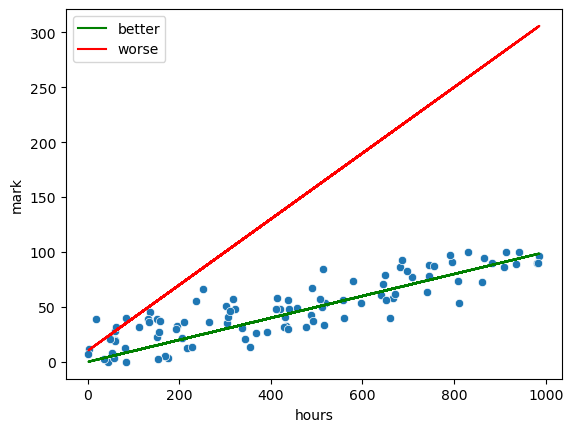

In [89]:
fig, ax = plt.subplots(1,1)

sns.scatterplot(x=data.hours, y=data.mark)

ax.plot(data.hours, data.prediction_1, color='g', label='better')
ax.plot(data.hours, data.prediction_2, color='r', label='worse')

plt.legend()

In [90]:
# The optimal linear model

In [91]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

optimal_m = lr.fit(X = data[["hours"]], y = data.mark).coef_[0]
optimal_n = lr.fit(X = data[["hours"]], y = data.mark).intercept_

data["best_prediction"] = data.hours * optimal_m + optimal_n

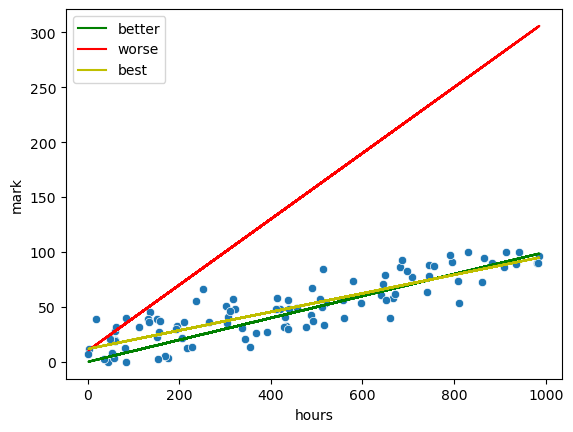

In [92]:
fig, ax = plt.subplots()
sns.scatterplot(x=data["hours"], y=data["mark"])

plt.plot(data.hours, data.prediction_1, color='g', label='better')
plt.plot(data.hours, data.prediction_2, color='r', label='worse')
plt.plot(data.hours, data.best_prediction, color='y', label='best')

plt.legend()

In [94]:
# What's really a linear regression model?

In [95]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Modeling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import pandas as pd
np.random.seed(123)